In [1]:
from time import sleep
from functools import cache
from keybert import KeyBERT
import numpy as np

kw_model = KeyBERT(model='all-MiniLM-L6-v2')

@cache
def create_embeddings(texts):
    doc_embeddings = kw_model.extract_embeddings(texts)
    if doc_embeddings: 
        return np.array(doc_embeddings[0][0])
    return np.zeros(384)

create_embeddings('hello')[:10]

array([-0.06277172,  0.05495872,  0.05216478,  0.08578996, -0.08274896,
       -0.07457294,  0.06855468,  0.01839648, -0.08201128, -0.03738483],
      dtype=float32)

In [2]:
def get_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))   

get_similarity(create_embeddings('dog'), create_embeddings('cat'))

0.6606376

In [5]:
from itertools import combinations
arr = ['OLD', 'RANGE', 'INK', 'SPOT', 'REX', 'ROVER',  'LACK', 'FLUFFY']
arr = [x.lower() for x in arr if x]

triplets = []

for _ in range(len(arr) // 4): 
    poss = []

    for i in combinations(arr, 3):
        total_similarity = []
        for j in combinations(i, 2):
            total_similarity.append(get_similarity(create_embeddings(j[0]), create_embeddings(j[1])))
        
        score = sum(total_similarity)
        poss.append((score, i))
        
    poss.sort(key=lambda x: x[0], reverse=True)
    
    triplets.append(list(poss[0][1]))
    for i in poss[0][1]:
        arr.remove(i)

for i in triplets:
    best, word = 0, ''
    for j in arr: 
        score = get_similarity(create_embeddings(i[0]), create_embeddings(j))
        if score > best: 
            best, word = score, j
    i.append(word)
    arr.remove(word)
    print(i)

['range', 'ink', 'spot', 'lack']
['old', 'rex', 'fluffy', 'rover']


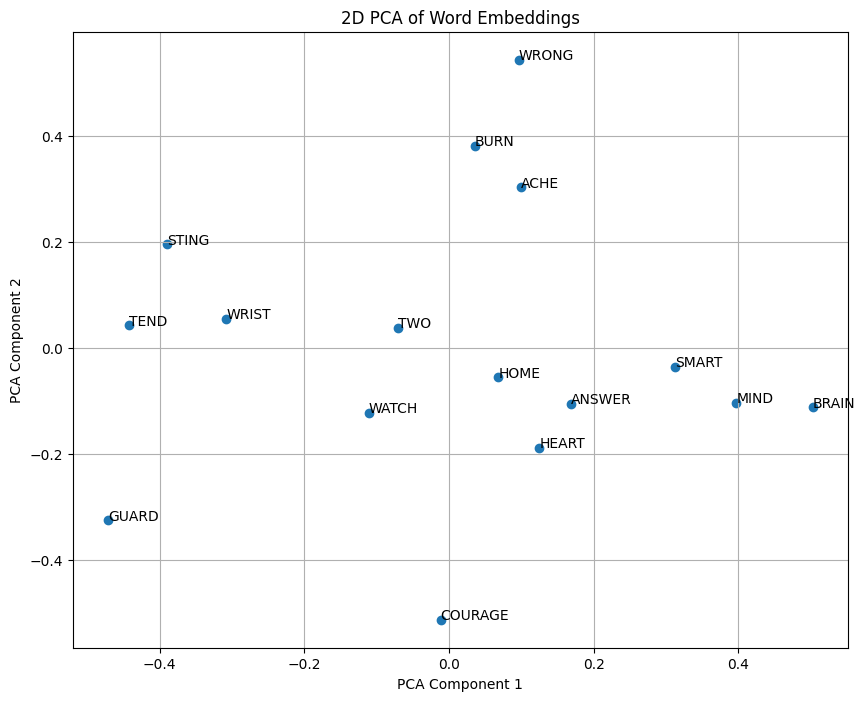

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

words = ['HEART', 'SMART', 'GUARD', 'BURN', 'MIND', 'COURAGE', 'BRAIN', 'TEND', 'WRIST', 'WRONG', 'STING', 'TWO', 'WATCH', 'ANSWER', 'HOME', 'ACHE']

np.random.seed(0) 
embeddings = np.array([create_embeddings(x) for x in words])

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

plt.title('2D PCA of Word Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()
